In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
column_names = ['category','Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids','Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None,names=column_names)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(wine.iloc[:,1:],wine.category,stratify=wine.category)

In [4]:
print("K Neighbours Classifier:")
k_range = range(1, 51)
max = 0
bestk = 0
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    if knn.score(X_test, y_test) > max:
        max = knn.score(X_test, y_test)
        bestk = k
print("The highest accuracy is- {} \n k={}".format(max,bestk))

K Neighbours Classifier:
The highest accuracy is- 0.8 
 k=1


In [5]:
print("LinearSVC:")
bestc = 0
max = 0
c_range = range(1, 51)
for c in c_range:
    Ls = LinearSVC(C=c)
    Ls.fit(X_train, y_train)
    if knn.score(X_test, y_test) > max:
        max = Ls.score(X_test, y_test)
        bestc = c
print("The highest accuracy is- {} \n c={}".format(max,bestc))

LinearSVC:
The highest accuracy is- 0.8666666666666667 
 c=2


In [6]:
def change_category(a,b,c):
    global conf
    wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None,names=column_names)
    wine.category = wine.category.map({1:a, 2:b, 3:c })
    print(wine.category.value_counts())
    X_train, X_test, y_train, y_test = train_test_split(wine.iloc[:,1:],wine.category,stratify=wine.category)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred_prob = logreg.predict_proba(X_test)[:, 1]
    print("The accuracy score is {}".format(logreg.score(X_test,y_test)))
    print("The AUC score is {}".format(metrics.roc_auc_score(y_test, y_pred_prob)))
    conf = metrics.confusion_matrix(y_test, logreg.predict(X_test))

The AUC score of category 1 vs (2,3)
0    119
1     59
Name: category, dtype: int64
(133, 13) (45, 13) (133,) (45,)
The accuracy score is 0.9777777777777777
The AUC score is 1.0


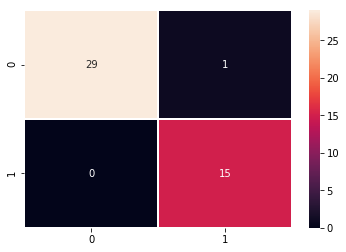

In [7]:
print("The AUC score of category 1 vs (2,3)")
change_category(1,0,0)
sns.heatmap(conf, annot=True, fmt="d", linewidths=.5)

The AUC score of category 2 vs (1,3)
0    107
1     71
Name: category, dtype: int64
(133, 13) (45, 13) (133,) (45,)
The accuracy score is 0.8888888888888888
The AUC score is 0.9711934156378601


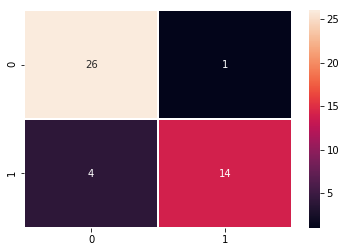

In [8]:
print("The AUC score of category 2 vs (1,3)")
change_category(0,1,0)
sns.heatmap(conf, annot=True, fmt="d", linewidths=.5)

The AUC score of category 3 vs (1,2)
0    130
1     48
Name: category, dtype: int64
(133, 13) (45, 13) (133,) (45,)
The accuracy score is 1.0
The AUC score is 1.0


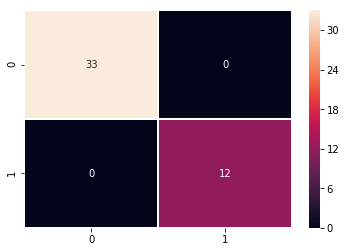

In [17]:
print("The AUC score of category 3 vs (1,2)")
change_category(0,0,1)
sns.heatmap(conf, annot=True, fmt="d", linewidths=.5)

In [15]:
# BUILT OFF OF - https://www.kaggle.com/joparga3/in-depth-skewed-data-classif-93-recall-acc-now

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  0.9333333333333333
Recall metric in the testing dataset:  0.9333333333333333
Recall metric in the testing dataset:  0.8
Recall metric in the testing dataset:  0.8
Recall metric in the testing dataset:  0.8
Recall metric in the testing dataset:  0.8
Recall metric in the testing dataset:  0.7333333333333333
Recall metric in the testing dataset:  0.4666666666666667


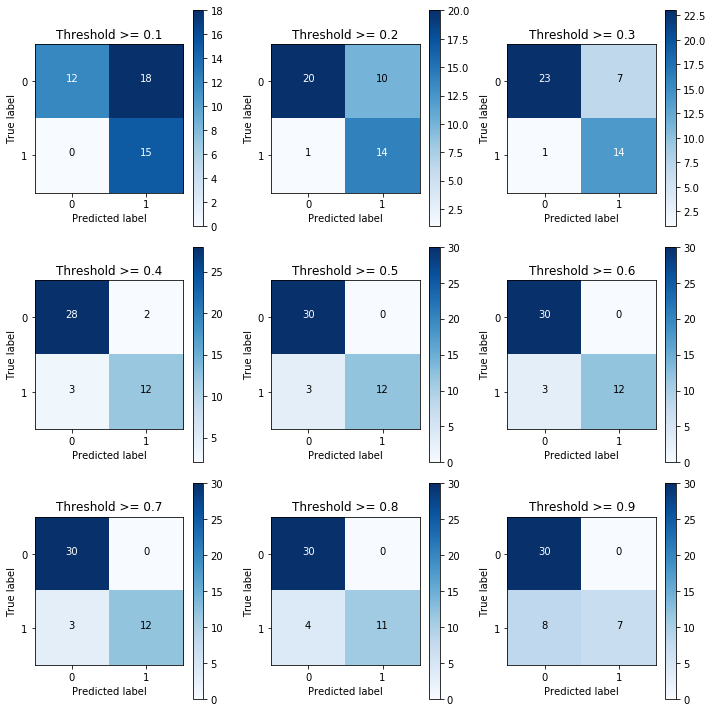

In [19]:
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None,names=column_names)
wine.category = wine.category.map({1:1, 2:0, 3:0 })
X_train, X_test, y_train, y_test = train_test_split(wine.iloc[:,1:],wine.category,stratify=wine.category)
logreg2 = LogisticRegression(C= 0.01, penalty='l1')
logreg2.fit(X_train, y_train)
y_pred_proba2 = logreg2.predict_proba(X_test)

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

plt.figure(figsize=(10,10))

j = 1

for i in thresholds:
    y_test_predictions_high_recall = y_pred_proba2[:, 1] > i
    
    plt.subplot(3, 3, j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = metrics.confusion_matrix(y_test, y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", float(cnf_matrix[1,1]) / float((cnf_matrix[1,0] + cnf_matrix[1,1])))

    # Plot non-normalized confusion matrix
    class_names = [0, 1]
    plot_confusion_matrix(cnf_matrix, classes=class_names, title='Threshold >= %s'%i) 

Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  0.9444444444444444
Recall metric in the testing dataset:  0.7777777777777778
Recall metric in the testing dataset:  0.6666666666666666
Recall metric in the testing dataset:  0.6111111111111112
Recall metric in the testing dataset:  0.5555555555555556
Recall metric in the testing dataset:  0.2222222222222222
Recall metric in the testing dataset:  0.05555555555555555
Recall metric in the testing dataset:  0.0


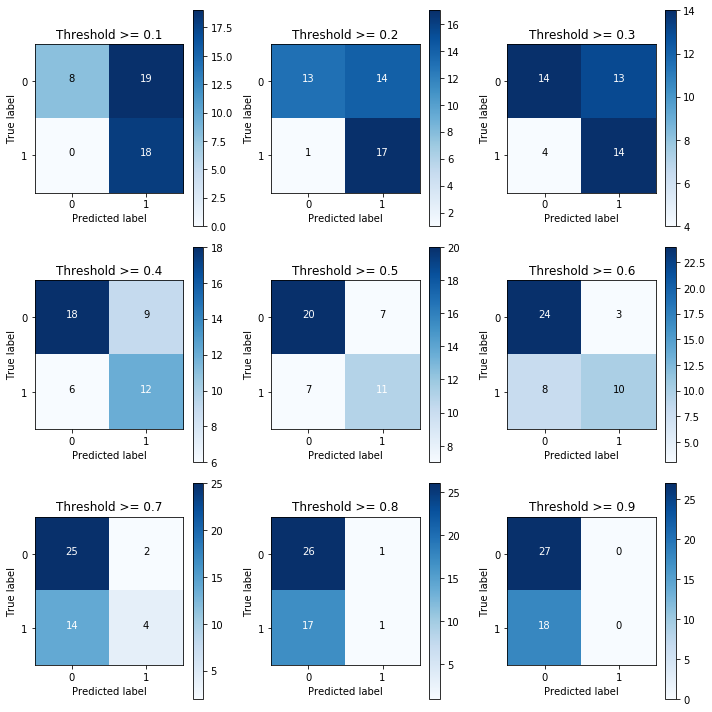

In [20]:
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None,names=column_names)
wine.category = wine.category.map({1:0, 2:1, 3:0 })
X_train, X_test, y_train, y_test = train_test_split(wine.iloc[:,1:],wine.category,stratify=wine.category)
logreg2 = LogisticRegression(C= 0.01, penalty='l1')
logreg2.fit(X_train, y_train)
y_pred_proba2 = logreg2.predict_proba(X_test)

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

plt.figure(figsize=(10,10))

j = 1

for i in thresholds:
    y_test_predictions_high_recall = y_pred_proba2[:, 1] > i
    
    plt.subplot(3, 3, j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = metrics.confusion_matrix(y_test, y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", float(cnf_matrix[1,1]) / float((cnf_matrix[1,0] + cnf_matrix[1,1])))

    # Plot non-normalized confusion matrix
    class_names = [0, 1]
    plot_confusion_matrix(cnf_matrix, classes=class_names, title='Threshold >= %s'%i) 

Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  0.5
Recall metric in the testing dataset:  0.0
Recall metric in the testing dataset:  0.0
Recall metric in the testing dataset:  0.0
Recall metric in the testing dataset:  0.0
Recall metric in the testing dataset:  0.0
Recall metric in the testing dataset:  0.0


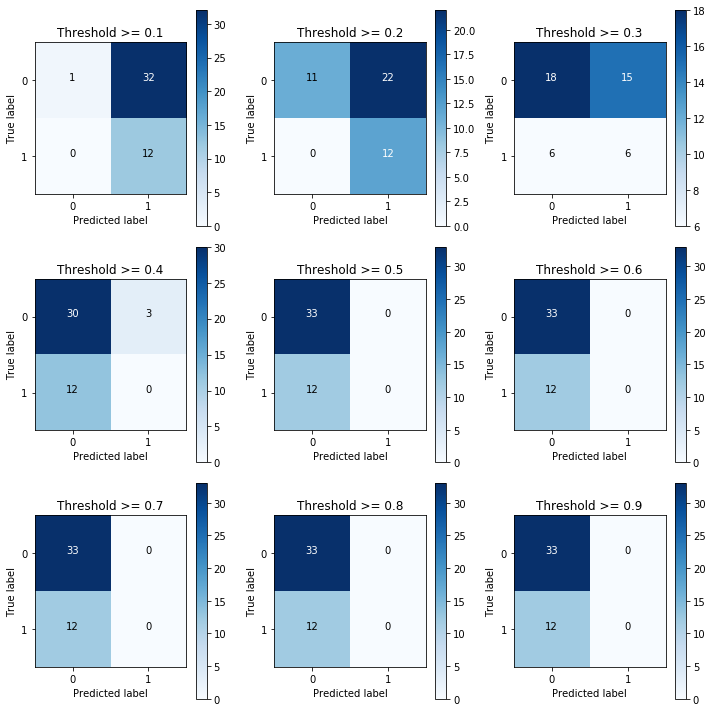

In [21]:
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None,names=column_names)
wine.category = wine.category.map({1:0, 2:0, 3:1 })
X_train, X_test, y_train, y_test = train_test_split(wine.iloc[:,1:],wine.category,stratify=wine.category)
logreg2 = LogisticRegression(C= 0.01, penalty='l1')
logreg2.fit(X_train, y_train)
y_pred_proba2 = logreg2.predict_proba(X_test)

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

plt.figure(figsize=(10,10))

j = 1

for i in thresholds:
    y_test_predictions_high_recall = y_pred_proba2[:, 1] > i
    
    plt.subplot(3, 3, j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = metrics.confusion_matrix(y_test, y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", float(cnf_matrix[1,1]) / float((cnf_matrix[1,0] + cnf_matrix[1,1])))

    # Plot non-normalized confusion matrix
    class_names = [0, 1]
    plot_confusion_matrix(cnf_matrix, classes=class_names, title='Threshold >= %s'%i) 